In [20]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from venn import venn

In [21]:
# First we check the structure and organisatio of each data
data_files = [file for file in os.listdir("./Fitabase_Data_4.12.16-5.12.16") if file.endswith(".csv")]
data_files.sort()
#print(data_files)
for f in data_files: 
    df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16",f)) 
    num_users = len(df["Id"].unique())
    print("*"*60)
    print(f"\n{f}\n{df.dtypes} \n")
    print(f"\n{f}\n{df.head()} \n")
    print(f"The shape of the data is {df.shape}")
    print(f"The nuber of users is {num_users}")
    print("*"*60 + "\n")

# flush out unwanted variables
del df, num_users

************************************************************

dailyActivity_merged.csv
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object 


dailyActivity_merged.csv
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9

In [22]:
# We can see that the daily infomations are integrated in the file named dailyActivity_merged.csv
# Another thing we can conclude from the the code is that not all the user used all the service
# Based on the result we know there are 
# 33 users track their daily activity
# 24 users track their sleep
# 14 users track their H.R.
# 8 users track their weights

dailyActivity_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "dailyActivity_merged.csv")) 
sleepDay_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "sleepDay_merged.csv"))
heartrate_seconds_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "heartrate_seconds_merged.csv"))
weightLogInfo_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "weightLogInfo_merged.csv"))

activity_set = set(dailyActivity_merged_df["Id"])
sleepDay_set = set(sleepDay_merged_df["Id"])
heartrate_set = set(heartrate_seconds_merged_df["Id"])
weight_set = set(weightLogInfo_merged_df["Id"])

print("Activity_users: {}".format(len(activity_set)))
print("sleepDay_users: {}".format(len(sleepDay_set)))
print("heartrate_users: {}".format(len(heartrate_set)))
print("weight_users: {}".format(len(weight_set)))
id_set = {
    "activity_set": activity_set,
    "sleepDay_set": sleepDay_set,
    "heartrate_set" : heartrate_set,
    "weight_set": weight_set

}


Activity_users: 33
sleepDay_users: 24
heartrate_users: 14
weight_users: 8


# To further explore we know

# There are overall 33 users

# Users who used dual function users
## 24 (72%) users track both activity and sleep 
## 14 () users track both activity and H.R. 
## 14 () users track both activity and weight.

# Users who used tripple function 
## 12 users track activity, sleep and H.R. 
## 6 users track activity, sleep and weghts. 

# Merely 3 users track activity, sleep, H.R. and weight

<AxesSubplot:>

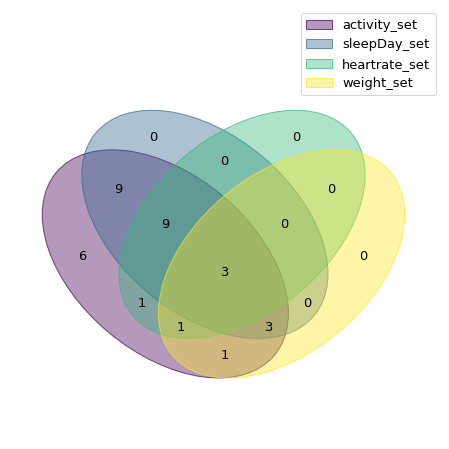

In [23]:
venn(id_set)

In [24]:




print(len(Activity_set.union(sleepDay_set, heartrate_set, weight_set)))

# Users who used dual function users
## 24 (72%) users track both activity and sleep 
## 14 () users track both activity and H.R. 
## 14 () users track both activity and weight.

print(len(Activity_set.intersection(sleepDay_set)))
print(len(Activity_set.intersection(heartrate_set)))
print(len(Activity_set.intersection(weight_set)))

# Users who used tripple function 
## 12 users track activity, sleep and H.R. 
print(len(Activity_set.intersection(sleepDay_set,heartrate_set)))

# 6 users track activity, sleep and weghts. 
print(len(Activity_set.intersection(sleepDay_set, weight_set)))

# 3 users track activity, sleep, H.R. and weight
print(len(Activity_set.intersection(sleepDay_set,heartrate_set, weight_set)))

NameError: name 'Activity_set' is not defined

In [ ]:
# Since there are 33 users who track daily activity 
# and 24 users track both daily activity and daily sleep 
# therefore we can merge these two data together
# Let's convert the daily activilty and sleep data into right format and merge them together
dailyActivity_merged_df["Date"] = pd.to_datetime(dailyActivity_merged_df["ActivityDate"])
sleepDay_merged_df["Date"] = pd.to_datetime(sleepDay_merged_df["SleepDay"])
daily_data = dailyActivity_merged_df.merge(right=sleepDay_merged_df, how="left", left_on=["Id", "Date"], right_on=["Id", "Date"])
daily_data["week_day"] = daily_data["Date"].dt.dayofweek
print(daily_data.dtypes) 
print(daily_data.shape) 

Id                                   int64
ActivityDate                        object
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Date                        datetime64[ns]
SleepDay                            object
TotalSleepRecords                  float64
TotalMinutesAsleep                 float64
TotalTimeInBed                     float64
week_day                             int64
dtype: object
(943, 21)


In [ ]:
# Clean the data

daily_data = daily_data.drop(["ActivityDate", "SleepDay"], axis=1)
daily_data = daily_data.drop_duplicates()
print(daily_data.dtypes) 
print(daily_data.shape)


Id                                   int64
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Date                        datetime64[ns]
TotalSleepRecords                  float64
TotalMinutesAsleep                 float64
TotalTimeInBed                     float64
week_day                             int64
dtype: object
(940, 19)


31    21
30     3
29     2
26     2
28     1
20     1
19     1
18     1
4      1
Name: TotalSteps, dtype: int64


Text(0, 0.5, 'Days of uasage')

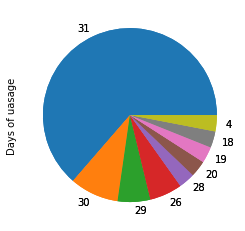

In [ ]:
# So that bring us the key question, how do people use their smart devices?
# That's starts with the frequency, Since all the users track their daily activity, 
# how long does they actually track
# from the figure we can see that 64 % of users track their activity everyday
print(daily_data.groupby("Id")["TotalSteps"].count().value_counts())

temp_data = daily_data.groupby("Id")["TotalSteps"].count().value_counts()
temp_data.plot.pie()
daily_data.groupby("Id")["TotalSteps"].count().value_counts().plot.pie()
plt.ylabel("Days of uasage")

['TotalSteps' 'TotalDistance' 'TrackerDistance' 'LoggedActivitiesDistance'
 'VeryActiveDistance' 'ModeratelyActiveDistance' 'LightActiveDistance'
 'SedentaryActiveDistance' 'VeryActiveMinutes' 'FairlyActiveMinutes'
 'LightlyActiveMinutes' 'SedentaryMinutes' 'Calories' 'TotalMinutesAsleep'
 'TotalTimeInBed']


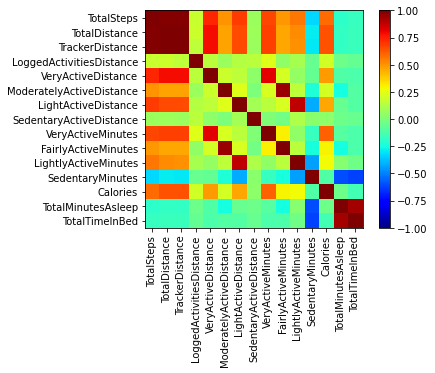

In [ ]:
# Now we can see the correlation between data
#print("{} \n {}".format(daily_data.describe(), "-"*60))

temp_daily_data = daily_data.drop(["Date", "Id", "TotalSleepRecords", "week_day"], axis = 1)
corr_map = temp_daily_data.corr()
corr_labels = temp_daily_data.columns.to_list()
print(temp_daily_data.columns.values)
#corr_labels = corr_labels.remove('Date')
plt.imshow(corr_map, cmap = "jet", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(ticks= range(len(corr_labels)),labels= corr_labels, rotation = 90)
plt.yticks(ticks= range(len(corr_labels)),labels= corr_labels)
plt.show()

Text(0, 0.5, 'Calories consumed')

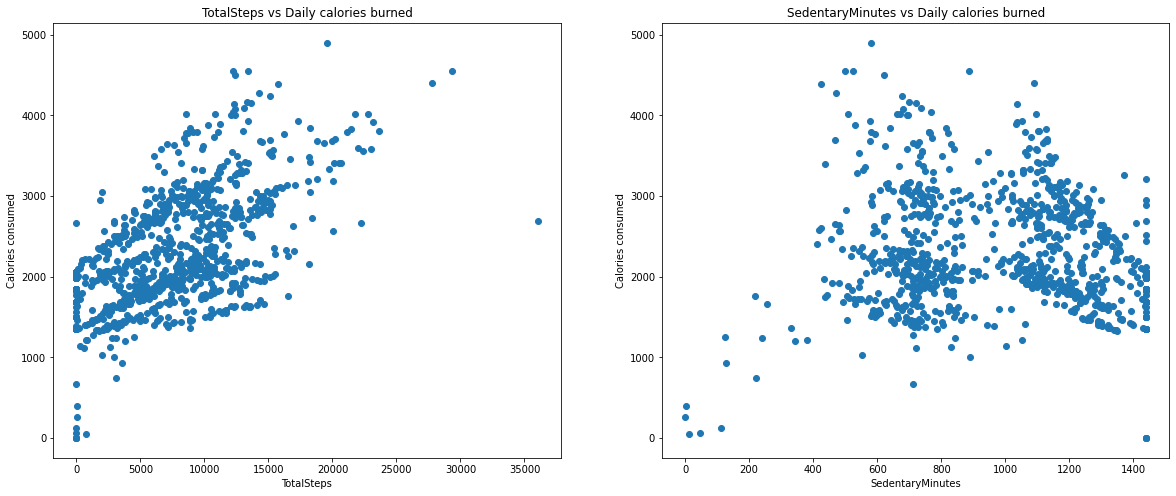

In [ ]:
# It seems that there's a high positive correlation between TotalSteps and Calories
# and negative correlation between SedentaryMinutes and calories
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
plt.scatter(x = daily_data["TotalSteps"], y = daily_data["Calories"])
plt.title("TotalSteps vs Daily calories burned")
plt.xlabel("TotalSteps")
plt.ylabel("Calories consumed")

plt.subplot(1, 2, 2)
plt.scatter(x = daily_data["SedentaryMinutes"], y = daily_data["Calories"])
plt.title("SedentaryMinutes vs Daily calories burned")
plt.xlabel("SedentaryMinutes")
plt.ylabel("Calories consumed")

Text(0, 0.5, 'Calories consumed')

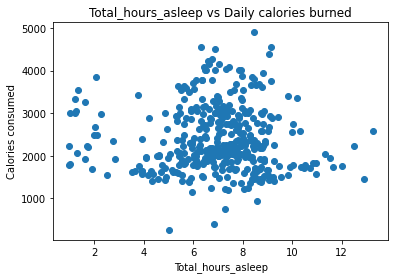

In [29]:
# But does their sleep time impact their calories burned as well?
# It seems no difference, bu if we take a close look
# We discovered that most data are locate between 6-8 hrs
plt.scatter(x = daily_data["TotalMinutesAsleep"]/60, y = daily_data["Calories"])
plt.title("Total_hours_asleep vs Daily calories burned")
plt.xlabel("Total_hours_asleep")
plt.ylabel("Calories consumed")

In [ ]:
# So I categorised their sleep patterns based on the duration
daily_data.loc[pd.isna(daily_data["TotalMinutesAsleep"]/60) == True , "sleepPatterns"] = "No Records"
daily_data.loc[daily_data["TotalMinutesAsleep"]/60 < 6, "sleepPatterns"] = "< 6 hours"
daily_data.loc[(daily_data["TotalMinutesAsleep"]/60 >= 6) & (daily_data["TotalMinutesAsleep"]/60 <=8), "sleepPatterns"] = "6-8 hours"
daily_data.loc[daily_data["TotalMinutesAsleep"]/60 > 8 , "sleepPatterns"] = "> 8 hours"



Text(0, 0.5, 'mean_Calories_consumed')

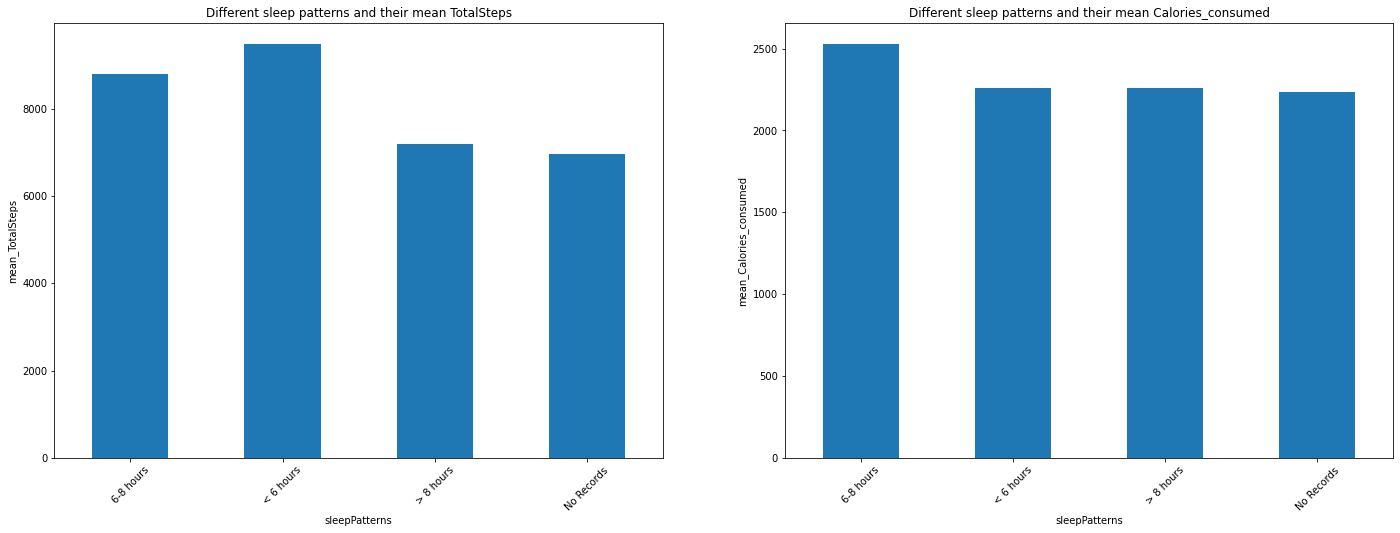

In [ ]:
# So generally those who sleep 6-8 hrs is more active and burns more calories 

plt.figure(figsize= (24, 8))
plt.subplot(1,2,1)
daily_data.groupby("sleepPatterns").mean()["TotalSteps"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their mean TotalSteps")
plt.ylabel("mean_TotalSteps")

plt.subplot(1,2,2)
daily_data.groupby("sleepPatterns").mean()["Calories"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their mean Calories_consumed")
plt.ylabel("mean_Calories_consumed")



Text(0, 0.5, 'mean_SedentaryMinutes')

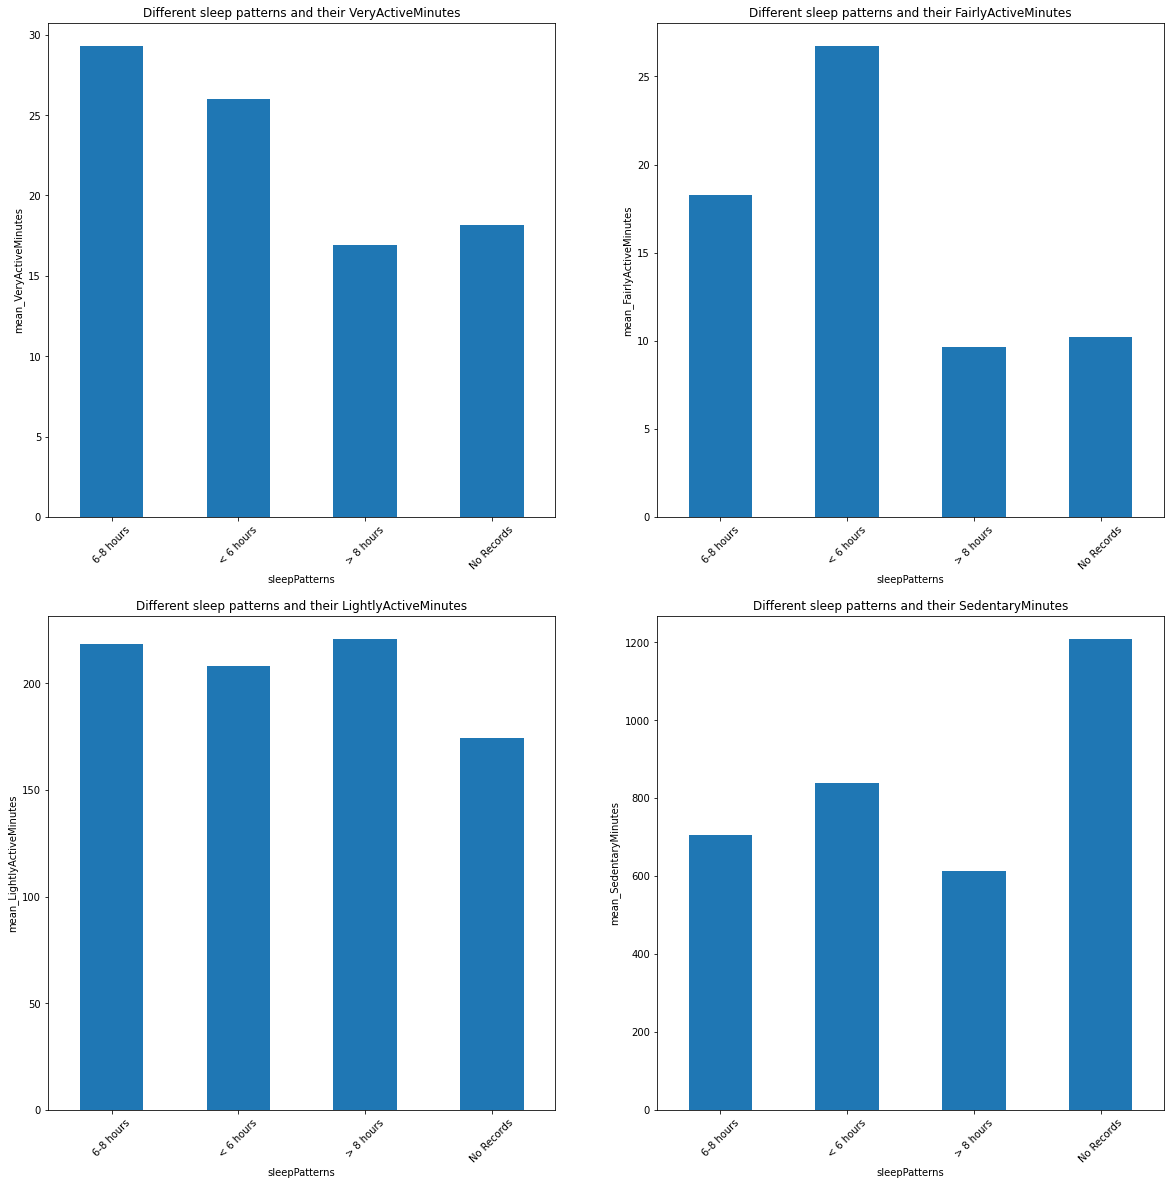

In [ ]:
# But why? That's a tough question to answer
# To answer that question we can do further analysis
# We discover that that those who sleep normally (6-8 hrs)
# are generaly have higher veryActive minutes
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
daily_data.groupby("sleepPatterns").mean()["VeryActiveMinutes"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their VeryActiveMinutes")
plt.ylabel("mean_VeryActiveMinutes")

plt.subplot(2,2,2)
daily_data.groupby("sleepPatterns").mean()["FairlyActiveMinutes"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their FairlyActiveMinutes")
plt.ylabel("mean_FairlyActiveMinutes")

plt.subplot(2,2,3)
daily_data.groupby("sleepPatterns").mean()["LightlyActiveMinutes"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their LightlyActiveMinutes")
plt.ylabel("mean_LightlyActiveMinutes")

plt.subplot(2,2,4)
daily_data.groupby("sleepPatterns").mean()["SedentaryMinutes"].plot.bar(rot = 45)
plt.title("Different sleep patterns and their SedentaryMinutes")
plt.ylabel("mean_SedentaryMinutes")

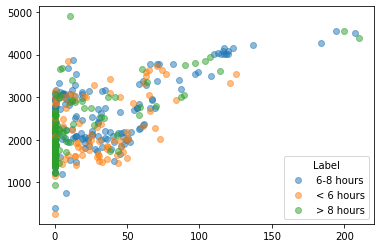

In [ ]:
daily_data_mod = daily_data[daily_data["sleepPatterns"] != "No Records"]

for n, grp in  daily_data_mod.groupby("sleepPatterns"):
    plt.scatter(x = "VeryActiveMinutes", y = "Calories", data=grp, label=n, alpha= 0.5)
plt.legend(title="Label")

Does the the activity patterns affect the sleep quality? 
Unfortunately, this dataset do not provide this information
This can be futher analysis, maybe can ask for the stakeholders.

In this rough analysis, we discovered that

Every user (N=33) have track have their daily activity for least 4 days
30 users track their daily activity more that 20 days

In general, 

In [ ]:
# Discover the trend in weghts, daily activity and sleep patterns

weightLogInfo_merged_df["Date"] = pd.to_datetime(weightLogInfo_merged_df["Date"]).dt.date
weightLogInfo_merged_df["Date"] = pd.to_datetime(weightLogInfo_merged_df["Date"])
#weightLogInfo_merged_df["time"] = pd.to_datetime(weightLogInfo_merged_df["Date"]).dt.time
daily_data = daily_data.merge(right=weightLogInfo_merged_df, how="left", left_on=["Id", "Date"], right_on=["Id", "Date"])
daily_data

In [ ]:
data_with_weight = daily_data.loc[(daily_data["WeightKg"] > 0)]
data_with_weight.groupby("Id").count()

In [ ]:
# Discover the trend in heart rate, daily activity and sleep patterns
# we have known that 12 people used this three functions
# Question, is the heartrate reflects the stress level?
#heartrate_seconds_merged_df.shape
#heartrate_seconds_merged_df["DateTime"] = pd.to_datetime(heartrate_seconds_merged_df["Time"])




In [ ]:
norm_sleep = daily_data.loc[daily_data["sleepPatterns"] == "6-8 hours"]
less_sleep = daily_data.loc[daily_data["sleepPatterns"] == "< 6 hours"]
more_sleep = daily_data.loc[daily_data["sleepPatterns"] == "> 8 hours"]
norm_sleep.groupby(["week_day"])["VeryActiveMinutes"].mean().plot.bar()
#more_sleep.groupby(["week_day"])["VeryActiveMinutes"].mean().plot.bar()
plt.title("Different sleep patterns and their very active time across different days")

In [ ]:
# daily_data.groupby(["sleepPatterns", "week_day"])["Calories"].mean().plot.bar()

In [ ]:
# daily_data.groupby(["week_day", "sleepPatterns"])["Calories"].mean().plot.bar()

In [ ]:
# The sleep patterns seems not affect by the steps our users took
# So that's see how the week day had any impact to users' sleep cycle and activity
# The week day starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6
# The sleep patterns across the week day are not that different
daily_data.boxplot(column=['TotalMinutesAsleep'], by=['week_day'], rot = 45)
plt.suptitle("")


# and the activity also showed slightly difference in different week days 
daily_data.boxplot(column=['TotalSteps'], by=['week_day'], rot = 45)
plt.suptitle("")
